In [1]:
import numpy as np
import cvxpy as cvx
import pandas as pd
import scipy.optimize
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf



### 1) 

### 2) 

#### Background 

### Pre-analysis Figures and Graphs

In [183]:
dtafile = 'dataset.dta'

df = pd.read_stata(dtafile)
df1 = df[df['year'] >= 1983]

df2 = df1.groupby(['region', 'reg'])[['gdppercap', 'mafia', 'murd', 'ext', 'fire', 'kidnap', 'rob', 'smug',
            'drug', 'theft', 'orgcrime']].mean()

df2 = df2.reset_index()

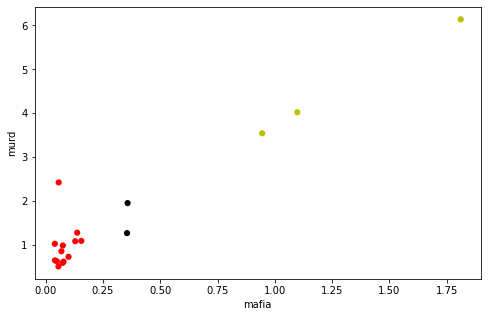

In [172]:
# Figure 3
df2.plot.scatter('mafia', 'murd', c=color, s=10, linewidth=3)
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

### Data Preparation

In [174]:
dtafile = 'dataset.dta'
data = pd.read_stata(dtafile)

tr_unit = data[data.reg == 21]
tr_unit = tr_unit[tr_unit.year <= 1960]
y_tr = np.array(tr_unit.gdppercap).reshape(1, 10)

ctr_units = data[(data.reg <= 14) | (data.reg ==20)]
ctr_units = ctr_units[ctr_units.year <= 1960]
y_ctr = np.array(ctr_units.gdppercap).reshape(15, 10)

tr_unit_all = data[data.reg == 21]
y_tr_all = np.array(tr_unit_all.gdppercap).reshape(1, 57)

ctr_units_all = data[(data.reg <= 14) | (data.reg ==20)]
y_ctr_all = np.array(ctr_units_all.gdppercap).reshape(15, 57)

### Data Organization into Appropriate Format 

In [113]:
X1 = data[data.reg == 21]
X1 = X1[X1.year <= 1960]
X1 = X1[['gdppercap', 'invrate', 'shvain', 'shvaag', 'shvams', 'shvanms', 'shskill', 'density']]
X1 = X1.set_index(np.arange(len(X1)) // 10).mean(level=0)
X1 = X1.values

X0 = data[(data.reg <= 14) | (data.reg ==20)]
X0 = X0[X0.year <= 1960]
X0 = X0[['gdppercap', 'invrate', 'shvain', 'shvaag', 'shvams', 'shvanms', 'shskill', 'density']]
X0 = X0.set_index(np.arange(len(X0)) // 10).mean(level=0)
X0 = X0.values